# Pie Chart Notebook

This notebook contains a pie chart of peoples email domains in the csv file located at the url given below.

<div><img src="https://cdn.hostadvice.com/2023/06/final-types-of-domains-0.jpeg.webp" alt="Domain Names", width=640, height=360"></div>

### Description of Assignment

***

### Task:

Create a notebook called assignment03-pie.ipynb

The note book should have a nice pie chart of peoples email domains in the csv file at the url

https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

This csv file has 1000 people. You may download the data or link to it.
Marks will be given for:

1. Just creating the pie chart
2. Making it look nice
and as always a very small amount of marks will be given for just pushing something to your repository this week
As always your code should be well laid out.

If you are having difficulties, know I will be doing more on Pie charts later in this module.

### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.


In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Load the dataset

***

The data file has being downloaded from the URL given above which is a link to a google drive file.


In [2]:
# Load the dataset. In this case I have loaded the dataset from a google drive link.
url = ('https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download')

df = pd.read_csv(url)

### Data Exploration

***

Display the first 5 rows of the dataset using the `df.head()` function, and check the datafram dimensionally with the `df.info` funtion.

In [3]:
# Display the first 5 rows of the dataset

df.head()

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Sex            1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          1000 non-null   object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


### Looking at the email column

***

As we want to plot domain names we are interested in the email column. As can be seen above this column already contains zero missing values and is of the type object. To make things simple we can add a new column to the dataset to contain the domain part of the email string. We will call this new column the `domain` column. 

Pandas has various built in string methods that can be used to manipulate strings. In this case we can simply use the [`str.split()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) function and pass it the `@` argument to split each email at this point. If not argument is passed, the default used is a whitespace. For our purposes the strings are split in two, with the `@` argument being the string seperator. We are then adding the second part of the split string `str[1]` to our new column 'domain`.

In [5]:
#Count the number of email addresses.
df['Email'].value_counts()

Email
pwarner@example.org           1
jhancock@example.com          1
joel78@example.com            1
koneal@example.net            1
uharrell@example.org          1
                             ..
ohorn@example.com             1
morganwendy@example.net       1
cherylmcmillan@example.org    1
balldrew@example.net          1
deannablack@example.org       1
Name: count, Length: 1000, dtype: int64

So we need to extract the unique domains listed in the email column. To do this we can create a new column called domain which will split the email string at the `@` symbol. We do this using the `str.split()` function as mentioned above.

In [6]:
# Create a new column called 'domain' that contains the domain name of the email addresses.
df['domain'] = df['Email'].str.split('@').str[1]

In [7]:
# Count the number of occurrences of each domain name.
df['domain'].value_counts()

domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

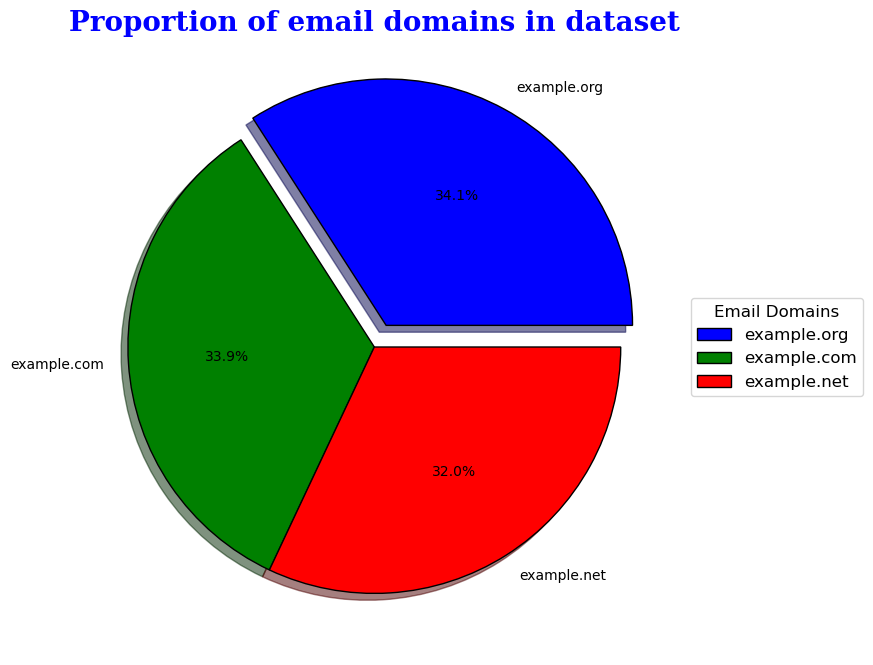

In [ ]:
#Pie chart for categorical data of email domains.

#https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

domain_counts = df['domain'].value_counts() #Count the number of email domains in the dataset.
#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotlib_labels.asp)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Create a pie chart of the email domains.
fig, ax = plt.subplots(figsize=(8, 8)) #Set the size of the pie chart.

#Create the pie chart.
ax.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1}, shadow=True, explode = (0.1, 0, 0)) 
#autopct='%1.1f%%' means that the percentages will be shown on the pie chart
#wedgeprops={'edgecolor': 'black', 'linewidth': 1} means that the edges of the pie chart will be black and the width of the edges will be 1.
#explode = (0.1, 0, 0) means that the first slice of the pie chart will be exploded out by 0.1.

ax.set_title('Proportion of email domains in dataset', fontdict = font1, weight = 'bold')

#Set the font and location of the lengend of the pie chart
ax.legend(title='Email Domains', title_fontsize='large', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize='large')
#bbox to anchor is used to set the location of the legend outside the pie chart.
#The arguments are (x, y, width, height) of the legend box.
#loc='center left' means that the legend will be located to the right of the pie chart.

shadow = True


plt.show()


## End